In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:

def generate_data(d, n_samples, noise_level=0.1, random_seed=0):
    """
    Generate synthetic data from a polynomial of degree d with added Gaussian noise.
    
    Parameters:
        d (int): Degree of the true underlying polynomial.
        n_samples (int): Number of data points to generate.
        noise_level (float): Standard deviation of the Gaussian noise.
        random_seed (int): Random seed for reproducibility.
    
    Returns:
        X (ndarray): Generated input data.
        y (ndarray): Generated noisy output data.
        true_coeffs (ndarray): Coefficients of the true polynomial.
    """
    np.random.seed(random_seed)
    X = np.random.uniform(-1, 1, n_samples)
    # Generate true polynomial coefficients
    true_coeffs = np.random.randn(d + 1)
    # Compute the true polynomial values
    y_true = np.polyval(true_coeffs[::-1], X)
    # Add Gaussian noise
    y = y_true + np.random.normal(0, noise_level, n_samples)
    
    return X, y, true_coeffs

def compute_aic(model, X, y):
    """
    Compute the Akaike Information Criterion (AIC) for a given model.
    
    Parameters:
        model: Fitted model.
        X (ndarray): Input data.
        y (ndarray): Observed output data.
    
    Returns:
        aic (float): The AIC value.
    """
    y_pred = model.predict(X)
    residuals = y - y_pred
    sse = np.sum(residuals**2)  # Sum of squared errors
    n = len(y)
    k = model.named_steps['linearregression'].coef_.size + 1  # Number of parameters + intercept
    aic = n * np.log(sse / n) + 2 * k
    return aic

def fit_and_select_polynomial(X, y, max_degree):
    """
    Fit polynomial models of varying degrees and select the best one using AIC.
    
    Parameters:
        X (ndarray): Input data.
        y (ndarray): Observed output data.
        max_degree (int): Maximum polynomial degree to consider.
    
    Returns:
        best_degree (int): The selected polynomial degree.
        best_model: The fitted model with the selected degree.
        aic_values (list): List of AIC values for each degree.
    """
    aic_values = []
    models = []
    X = X[:, np.newaxis]  # Reshape X for sklearn compatibility
    
    for degree in range(1, max_degree + 1):
        # Create a pipeline for polynomial feature transformation + linear regression
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X, y)
        models.append(model)
        # Compute AIC
        aic = compute_aic(model, X, y)
        aic_values.append(aic)
    
    # Select the model with the lowest AIC
    best_degree = np.argmin(aic_values) + 1
    best_model = models[best_degree - 1]
    
    return best_degree, best_model, aic_values

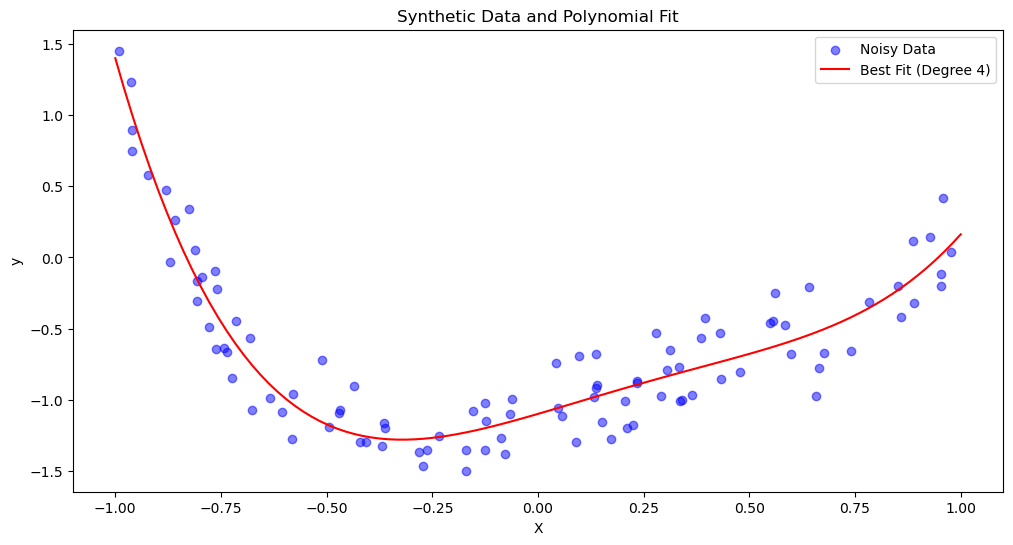

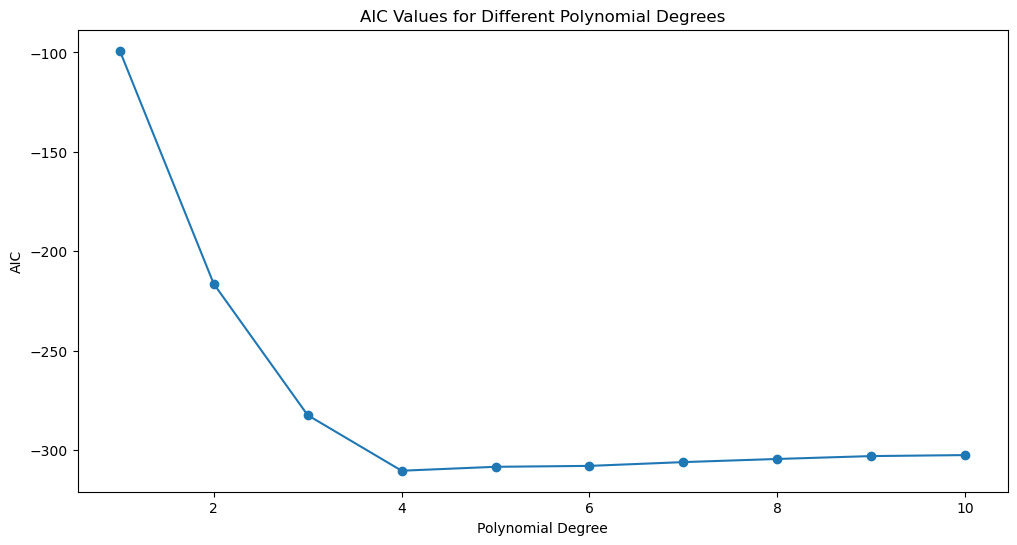

The best polynomial degree according to AIC is: 4


In [3]:

# Parameters
true_degree = 4  # Degree of the true underlying polynomial
n_samples = 100  # Number of data points
noise_level = 0.2  # Noise standard deviation
max_degree = 10  # Maximum degree of polynomial to consider

# Generate synthetic data
X, y, true_coeffs = generate_data(d=true_degree, n_samples=n_samples, noise_level=noise_level)

# Fit polynomial models and select the best degree using AIC
best_degree, best_model, aic_values = fit_and_select_polynomial(X, y, max_degree)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="Noisy Data", color="blue", alpha=0.5)
X_plot = np.linspace(-1, 1, 100).reshape(-1, 1)
plt.plot(X_plot, best_model.predict(X_plot), label=f"Best Fit (Degree {best_degree})", color="red")
plt.title("Synthetic Data and Polynomial Fit")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Plot AIC values
plt.figure(figsize=(12, 6))
plt.plot(range(1, max_degree + 1), aic_values, marker='o')
plt.title("AIC Values for Different Polynomial Degrees")
plt.xlabel("Polynomial Degree")
plt.ylabel("AIC")
plt.show()

print(f"The best polynomial degree according to AIC is: {best_degree}")
